Import EDA packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Load login data.

In [2]:
logins_df = pd.read_json('logins.json')

In [3]:
logins_df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [4]:
logins_df.describe()

login_time
count                          93142
mean   1970-02-26 19:09:39.779648278
min              1970-01-01 20:12:16
25%       1970-02-04 10:37:19.750000
50%       1970-03-01 06:33:05.500000
75%       1970-03-22 04:01:10.750000
max              1970-04-13 18:57:38

In [5]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [6]:
logins_df.isnull().sum()

login_time    0
dtype: int64

In [7]:
#Set login time as index
logins_df.set_index('login_time', inplace=True)

#Add frequency count column for aggregation 
logins_df['count'] = 1

#Create new dataframe for aggregation
logins_df_agg = logins_df.resample("15min").sum()


In [8]:
logins_df_agg.head()

count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1

In [9]:
logins_df_agg['count'].sum()==len(logins_df)

True

First plot all the logins for the 4 month period.

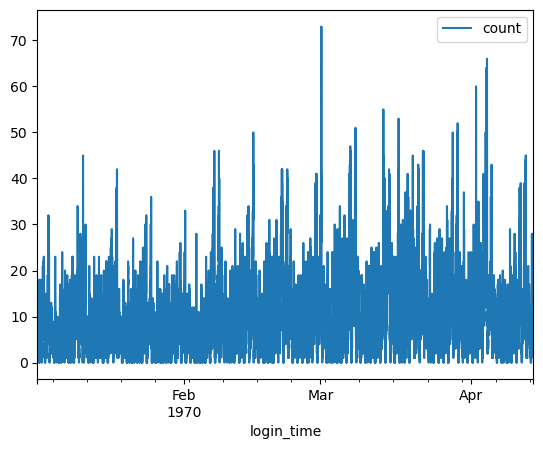

In [10]:
logins_df_agg.plot()
plt.show()

In [11]:
len(logins_df_agg)

9788

In [12]:
logins_df_agg.describe()

count
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000

In [13]:
logins_df_agg.loc['1970-03'].describe()

count
count  2976.000000
mean     11.331653
std       9.335820
min       0.000000
25%       4.000000
50%       9.000000
75%      16.000000
max      73.000000

Here is a rolling window of the mean per day, where (minutes in a day)/(15 minutes) gives a window of 96. We can see a general rising trend.

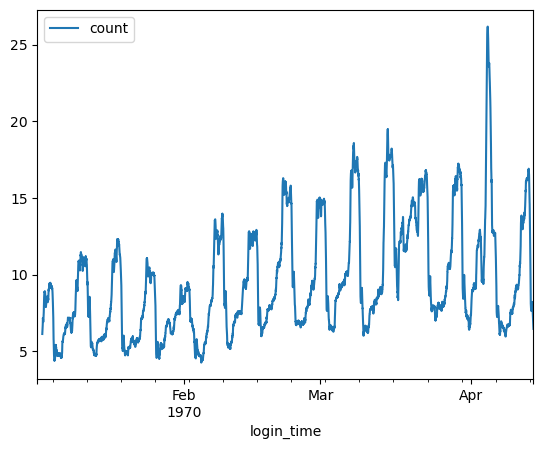

In [14]:
logins_df_agg.rolling(window=96).mean().plot()
plt.show()

Isolating to one month, we see a weekly trend.

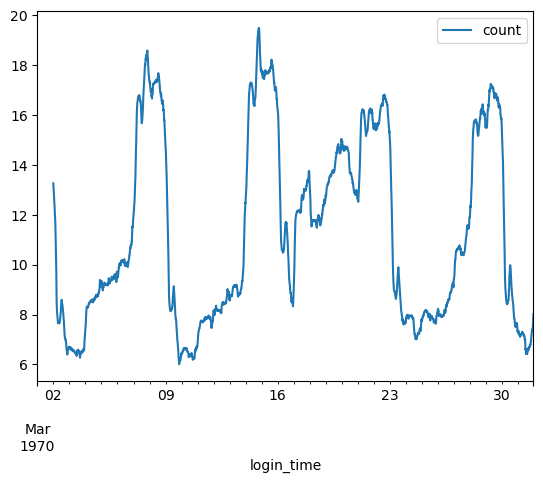

In [15]:
logins_df_agg.loc['1970-03'].rolling(window=96).mean().plot()
plt.show()

In [16]:
datetime.datetime(1970, 3, 1).weekday()

6

Recall that 6 in datetime is a Sunday, so let's look at this week.

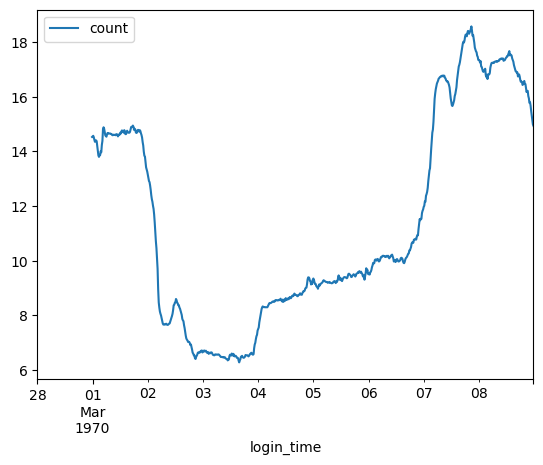

In [17]:
logins_df_agg.loc['1970-02-28':'1970-03-08'].rolling(window=96).mean().plot()
plt.show()

In [18]:
datetime.datetime(1970, 1, 2).weekday()

4

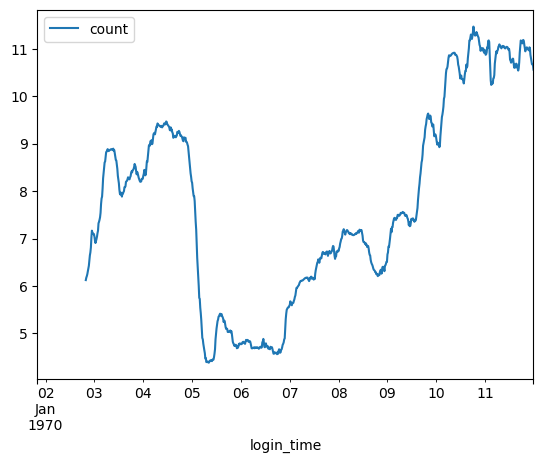

In [19]:
logins_df_agg.loc['1970-01-01':'1970-01-11'].rolling(window=96).mean().plot()
plt.show()

In [20]:
datetime.datetime(1970, 1, 4).weekday()

6

We can see the demand increases during the weekend.

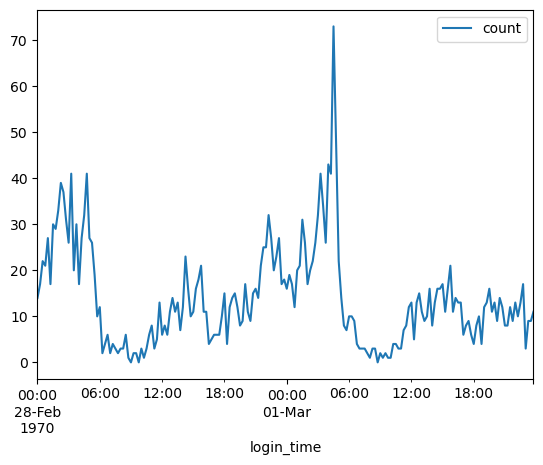

In [21]:
logins_df_agg.loc['1970-02-28':'1970-03-01'].plot()
plt.show()

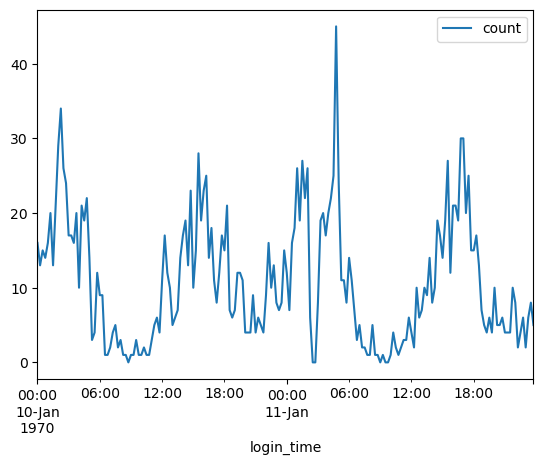

In [22]:
#Weekend Example
logins_df_agg.loc['1970-01-10':'1970-01-11'].plot()
plt.show()

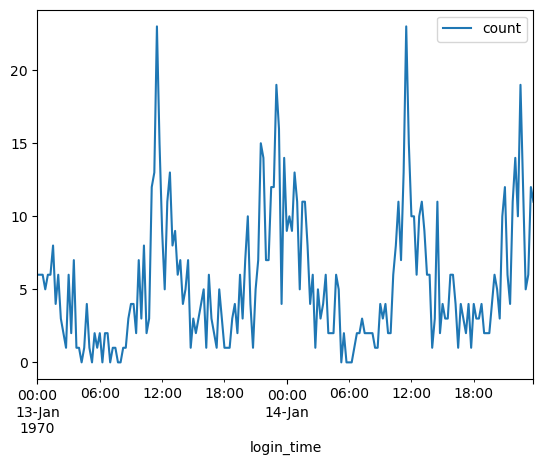

In [23]:
#Weekday Example
logins_df_agg.loc['1970-01-13':'1970-01-14'].plot()
plt.show()

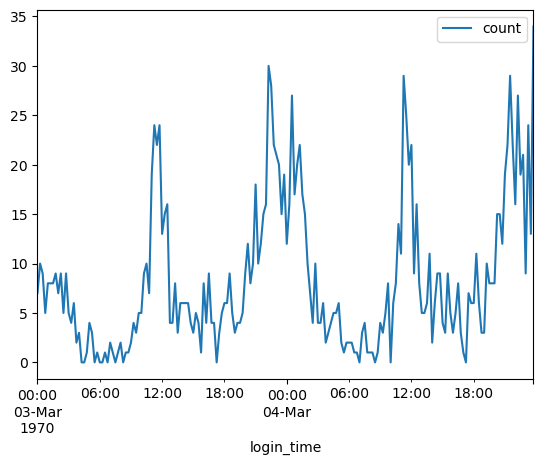

In [24]:
#Another weekday
logins_df_agg.loc['1970-03-03':'1970-03-04'].plot()
plt.show()

Conclusions

1. The mean login count at around 9.5 is higher than the median at 7, pointing at a skew in the data.
2. In general, there is an upward trend in logins throughout the 4 months.
3. Demand during the week is higher on weekends.
4. Peak hours on any given day is at noon and midnight.